# L3: Large Multimodal Models (LMMs)

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px"> ⏳ <b>Note <code>(Kernel Starting)</code>:</b> This notebook takes about 30 seconds to be ready to use. You may start and watch the video while you wait.</p>

* In this classroom, the libraries have been already installed for you.
* If you would like to run this code on your own machine, you need to install the following:
```
    !pip install google-generativeai

```

Note: don't forget to set up your GOOGLE_API_KEY to use the Gemini Vision model in the env file.
```
   %env GOOGLE_API_KEY=************
```
Check the [documentation](https://ai.google.dev/gemini-api/docs/api-key) for more infomation.

In [1]:
import warnings
warnings.filterwarnings('ignore')

## Setup
### Load environment variables and API keys

In [2]:
import os
from dotenv import load_dotenv, find_dotenv

_ = load_dotenv(find_dotenv()) # read local .env file
GOOGLE_API_KEY=os.getenv('GOOGLE_API_KEY')

In [3]:
# Set the genai library
import google.generativeai as genai
from google.api_core.client_options import ClientOptions

genai.configure(
        api_key=GOOGLE_API_KEY,
        transport="rest",
        client_options=ClientOptions(
            api_endpoint=os.getenv("GOOGLE_API_BASE"),
        ),
)

> Note: learn more about [GOOGLE_API_KEY](https://ai.google.dev/) to run it locally.

## Helper functions

In [4]:
import textwrap
import PIL.Image
from IPython.display import Markdown, Image

def to_markdown(text):
    text = text.replace('•', '  *')
    return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))


* Function to call LMM (Large Multimodal Model).

In [5]:
def call_LMM(image_path: str, prompt: str) -> str:
    # Load the image
    img = PIL.Image.open(image_path)

    # Call generative model
    model = genai.GenerativeModel('gemini-1.5-flash')
    response = model.generate_content([prompt, img], stream=True)
    response.resolve()

    return to_markdown(response.text)  

## Analyze images with an LMM

In [6]:
# Pass in an image and see if the LMM can answer questions about it
Image(url= "SP-500-Index-Historical-Chart.jpg")

In [7]:
# Use the LMM function
call_LMM("SP-500-Index-Historical-Chart.jpg", 
    "Explain what you see in this image.")

> The image is a line graph depicting the historical performance of the S&P 500 stock market index from 1960 to 2020. The x-axis represents years, and the y-axis represents the index value. The graph shows that the S&P 500 has generally trended upwards over time, with some periods of volatility. The index has experienced significant growth in recent decades.

## Analyze a harder image

* Try something harder: Here's a figure we explained previously!

In [8]:
Image(url= "clip.png")

In [9]:
call_LMM("clip.png", 
    "Explain what this figure is and where is this used.")

> This figure shows the architecture of a contrastive pre-training approach for multimodal learning. It utilizes two encoders: an image encoder and a text encoder. 
> 
> **Here's how it works:**
> 
> 1. **Input:** The model takes in paired image and text data.  
> 2. **Encoding:** Each input image is processed by the image encoder, and each text description is processed by the text encoder. These encoders generate vector representations of their respective inputs.
> 3. **Contrastive Learning:** The model then learns to associate the image and text representations based on the "contrastive loss". This loss function encourages the model to generate similar embeddings for images and their corresponding text descriptions, while pushing embeddings from different pairs apart.
> 
> **The figure illustrates this with a matrix:**
> 
> - **Rows:** Represent different images (I1, I2... IN)
> - **Columns:** Represent different text descriptions (T1, T2... TN)
> - **Cells:** Each cell represents a pair of image and text.  The model is trained to maximize similarity within pairs (highlighted blue) and minimize similarity between mismatched pairs.
> 
> **Where this is used:**
> 
> This contrastive pre-training approach is widely used in multimodal learning applications, including:
> 
> - **Image captioning:** Generating descriptions for images.
> - **Visual question answering:** Answering questions based on images.
> - **Multimodal retrieval:** Searching for images based on text queries or vice versa.
> - **Cross-modal understanding:**  Helping machines better understand the relationship between visual and textual information. 
> 
> **The benefits of this approach include:**
> 
> - **Improved performance:** Contrastive learning helps models learn more robust and generalizable representations, leading to better performance on various downstream tasks.
> - **Reduced need for large labeled datasets:** By leveraging unlabeled data, contrastive pre-training can reduce the reliance on costly and time-consuming annotation processes.
> - **Enhanced transfer learning:**  Pre-trained models can be effectively fine-tuned for specific downstream tasks, achieving impressive results.


## Decode the hidden message

<p style="background-color:#fff6ff; padding:15px; border-width:3px; border-color:#efe6ef; border-style:solid; border-radius:6px"> 💻 &nbsp; <b>Access Utils File and Helper Functions:</b> To access the files for this notebook, 1) click on the <em>"File"</em> option on the top menu of the notebook and then 2) click on <em>"Open"</em>. For more help, please see the <em>"Appendix - Tips and Help"</em> Lesson.</p>


In [10]:
Image(url= "blankimage3.png")

In [11]:
# Ask to find the hidden message
call_LMM("blankimage3.png", 
    "Read what you see on this image.")

> You can vectorize the whole world with Weaviate!

## How the model sees the picture!

> You have to be careful! The model does not "see" in the same way that we see!

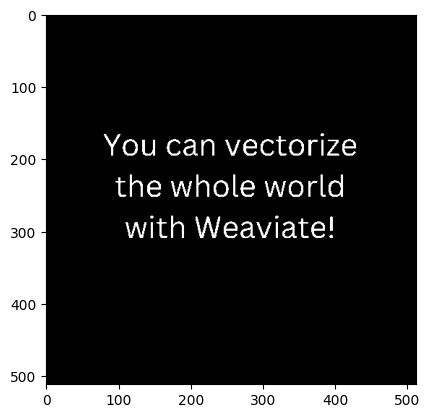

In [12]:
import imageio.v2 as imageio
import numpy as np
import matplotlib.pyplot as plt

image = imageio.imread("blankimage3.png")

# Convert the image to a NumPy array
image_array = np.array(image)

plt.imshow(np.where(image_array[:,:,0]>120, 0,1), cmap='gray');

### Try it yourself!

**EXTRA!**  You can use the function below to create your own hidden message, into an image:

In [20]:
# Create a hidden text in an image
def create_image_with_text(text, font_size=20, font_family='sans-serif', text_color='#73D955', background_color='#7ED957'):
    fig, ax = plt.subplots(figsize=(5, 5))
    fig.patch.set_facecolor(background_color)
    ax.text(0.5, 0.5, text, fontsize=font_size, ha='center', va='center', color=text_color, fontfamily=font_family)
    ax.axis('off')
    plt.tight_layout()
    return fig

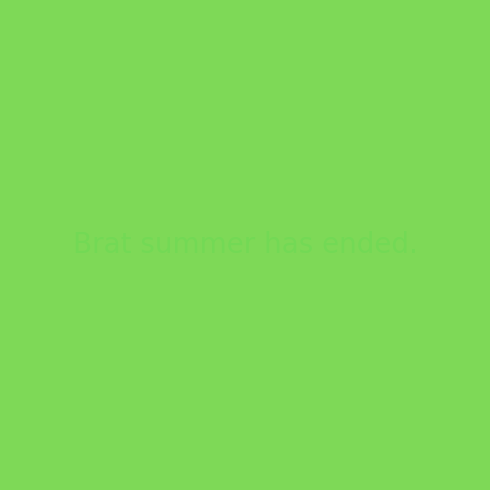

In [21]:
# Modify the text here to create a new hidden message image!
fig = create_image_with_text("Brat summer has ended.") 

# Plot the image with the hidden message
plt.show()
fig.savefig("extra_output_image.png")

In [22]:
# Call the LMM function with the image just generated
call_LMM("extra_output_image.png", 
    "Read what you see on this image.")

> Brat summer has ended.

* It worked!, now plot the image decoding the message.

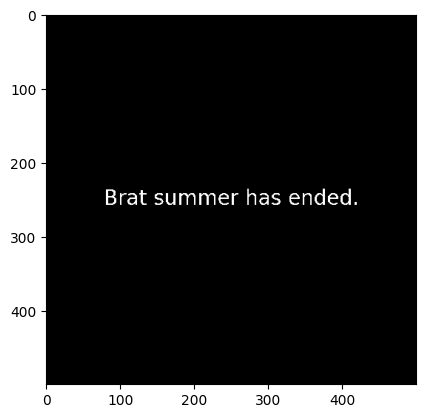

In [23]:
image = imageio.imread("extra_output_image.png")

# Convert the image to a NumPy array
image_array = np.array(image)

plt.imshow(np.where(image_array[:,:,0]>120, 0,1), cmap='gray');